In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mlp_df = 'mlp_results.csv'
kan_df = 'kan_results.csv'

In [6]:
mlp_df = pd.read_csv(mlp_df)
kan_df = pd.read_csv(kan_df)

In [9]:
print(mlp_df.columns)
mlp_df.head()

Index(['epoch', ' train_acc', ' test_acc', ' time'], dtype='object')


,epoch,train_acc,test_acc,time
0,0,0.904247,0.910256,25.75
1,2,0.933443,0.934195,38.61
2,4,0.940087,0.940004,38.58
3,6,0.943960,0.948618,38.14
4,8,0.946247,0.947015,37.17


Text(0.5, 1.0, 'MNIST Training Time using HSIC Bottleneck Training')

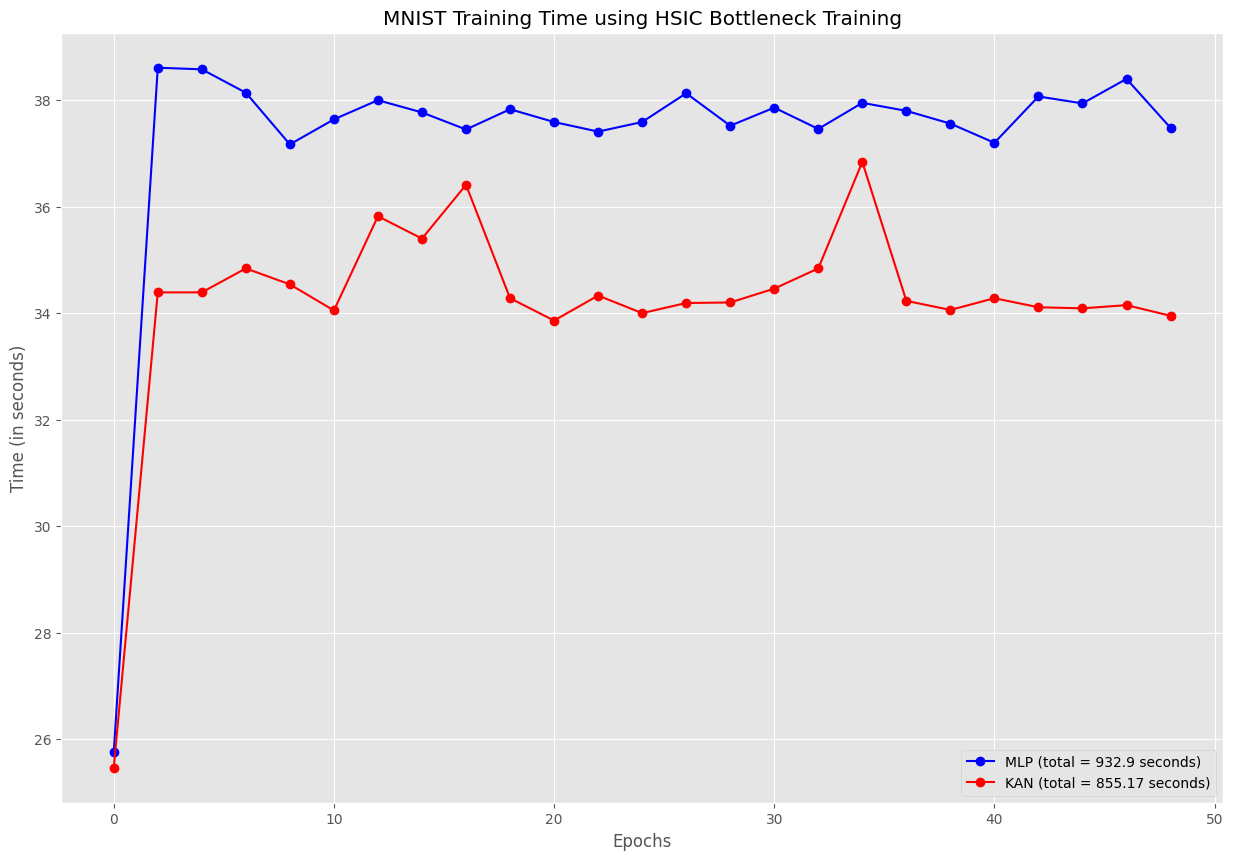

In [38]:
import numpy as np

plt.style.use('ggplot')
plt.subplots(figsize = (15,10))
epochs = mlp_df['epoch']
total_mlp = np.sum(mlp_df[' time']).round(2)
total_kan = np.sum(kan_df[' time']).round(2)

plt.plot(epochs, mlp_df[' time'], color = 'blue', label = 'MLP (total = ' + str(total_mlp) + " seconds)", marker = 'o')
plt.plot(epochs, kan_df[' time'], color = 'red', label = 'KAN (total = ' + str(total_kan) + " seconds)", marker = 'o')

plt.xlabel("Epochs")
plt.ylabel("Time (in seconds)")
plt.legend()
plt.title("MNIST Training Time using HSIC Bottleneck Training")

In [64]:
import pandas as pd
import numpy as np
import os

RESULTS_FOLDER = './Results/'
result_files = [os.path.join(RESULTS_FOLDER, x) for x in os.listdir(RESULTS_FOLDER) if x.endswith('.csv') and 'optimizer' in x]
result_rows = []
for r in result_files:
    
    filename = os.path.split(r)[-1]
    print("Processing: ", filename)

    # Extract relevent information from filename
    params = filename.replace(".csv", "").split("_")
    dataset = params[0]
    backprop = params[1]
    model = params[2]
    num_layers = params[3]
    batchsize = int(params[5])
    lr = float(params[7])
    epochs = int(params[9])
    num_parameters = int(params[11])
    optimizer = params[13]

    # Get best test performance and when it was reached
    data = pd.read_csv(r)
    best_perf_test =  np.max(data['Test_loss'])
    best_perf_train = np.max(data['Train_loss'])
    best_perf_epoch_test = np.where(data['Test_loss'] == best_perf_test)[0][0]
    epochs = np.max(data['Epoch'])

    # Get the average time taken per epoch
    avg_time = np.mean(data['Time'])

    result_rows.append([dataset, backprop, model, num_layers, batchsize, lr, epochs, num_parameters, 
                       optimizer, best_perf_train, best_perf_test, best_perf_epoch_test, avg_time])


df = pd.DataFrame(result_rows)
df.columns = ["Dataset", "Backprop", "Model", "Num_layers", "Batchsize", "LearningRate", "TotalEpochs", "Num_parameters",
              "Optimizer", "Best_train", "Best_test", "Best_test_at", "Avg_time"]

print(df.head())


Processing:  MNIST_backprop_kan_2layers_batchsize_4096_lr_0.0005_epochs_2_parameters_127040_optimizer_Adam_init_kaiming_normal_.csv
Processing:  MNIST_backprop_kan_2layers_batchsize_4096_lr_0.0005_epochs_2_parameters_127040_optimizer_Adam_init_kaiming_uniform_.csv
Processing:  MNIST_backprop_kan_2layers_batchsize_4096_lr_0.0005_epochs_2_parameters_127040_optimizer_SGDM_init_kaiming_normal_.csv
Processing:  MNIST_backprop_kan_2layers_batchsize_4096_lr_0.0005_epochs_2_parameters_127040_optimizer_SGD_init_kaiming_normal_.csv
Processing:  MNIST_backprop_kan_2layers_batchsize_4096_lr_0.0005_epochs_2_parameters_127040_optimizer_SGD_init_kaiming_uniform_.csv
Processing:  MNIST_backprop_kan_2layers_batchsize_4096_lr_0.0005_epochs_6_parameters_254080_optimizer_Adam.csv
Processing:  MNIST_backprop_kan_2layers_batchsize_4096_lr_0.0005_epochs_6_parameters_254080_optimizer_SGD.csv
Processing:  MNIST_backprop_kan_2layers_batchsize_4096_lr_0.0005_epochs_6_parameters_254080_optimizer_SGDM.csv
Processi

In [59]:
df['Optimizer'] = pd.Series([x.strip() for x in df.Optimizer])
df['ModelType'] = df['Model'] + "_" + df['Num_layers']
df['Efficiency'] = (df['Best_test'] / (df['Best_test_at'] + 1))*np.sqrt((1e9 - df['Num_parameters']))
#df.sort_values('Best_test')
df.sort_values('Efficiency')

,Dataset,Backprop,Model,Num_layers,Batchsize,LearningRate,TotalEpochs,Num_parameters,Optimizer,Best_train,Best_test,Best_test_at,Avg_time,ModelType,Efficiency
53,MNIST,backprop,mlp,2layers,4096,0.0500,98,25514,Adam,0.989729,0.966064,33,7.742144,mlp_2layers,898.507369
55,MNIST,backprop,mlp,2layers,4096,0.0500,98,25514,SGDM,0.994001,0.967285,32,7.714621,mlp_2layers,926.904615
78,MNIST,backprop,mlp,3layers,4096,0.0500,98,52842,SGD,0.999494,0.974121,30,7.708465,mlp_3layers,993.664517
54,MNIST,backprop,mlp,2layers,4096,0.0500,98,25514,SGD,0.992292,0.966797,23,7.714469,mlp_2layers,1273.850515
79,MNIST,backprop,mlp,3layers,4096,0.0500,98,52842,SGDM,1.000000,0.975098,23,7.670525,mlp_3layers,1284.770032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,MNIST,backprop,mlp,3layers,4096,0.0005,2,52842,Adam,0.975272,0.964111,0,7.586764,mlp_3layers,30487.070728
67,MNIST,backprop,mlp,3layers,4096,0.0005,2,52842,SGD,0.975359,0.964355,0,7.531591,mlp_3layers,30494.791858
85,MNIST,backprop,mlp,3layers,4096,0.0500,4,52842,SGDM,0.977487,0.964844,0,7.527029,mlp_3layers,30510.232219
75,MNIST,backprop,mlp,3layers,4096,0.0050,4,52842,SGD,0.985299,0.966186,0,7.360365,mlp_3layers,30552.692580


In [65]:
df.to_csv('results_compiled.csv')

Text(0.5, 1.0, 'Test Acc under Backprop Training Schemes')

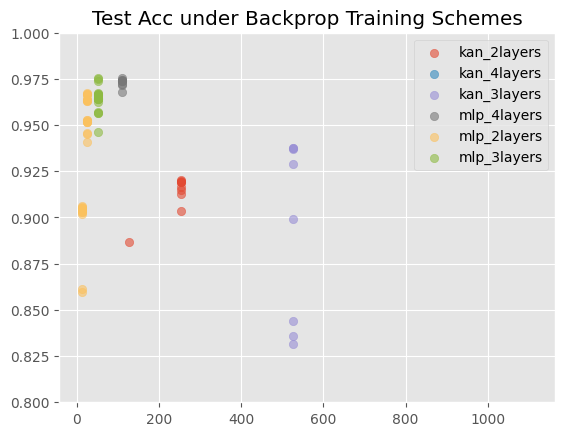

In [60]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
for model in set(np.unique(df['ModelType'])):
    sa = df[(df.ModelType ==model)]
    plt.scatter(sa.Num_parameters/1000, sa.Best_test, marker = 'o', label = model, alpha = 0.6)
plt.ylim(0.8, 1)
plt.legend()
plt.title("Test Acc under Backprop Training Schemes")
#for i in set(sa.Num_layers):
#    print(i)
#    plt.plot(sa[sa.Num_layers==i].Best_test, label = i)
#sa = sa[sa.Optimizer == 'AdamW']
#sa = sa[sa.LearningRate == 

Text(0.5, 1.0, 'Avg. Epoch Time under Backprop Training Schemes')

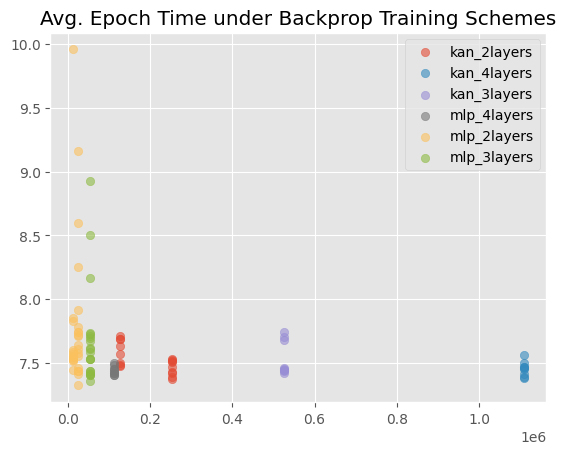

In [61]:
import matplotlib.pyplot as plt
for model in set(np.unique(df['ModelType'])):
    sa = df[(df.ModelType ==model)]
    plt.scatter(sa.Num_parameters, sa.Avg_time, marker = 'o', label = model, alpha = 0.6)
plt.legend()
plt.title("Avg. Epoch Time under Backprop Training Schemes")

Text(0.5, 1.0, 'Efficiency vs Test Performance under Backprop Training Schemes')

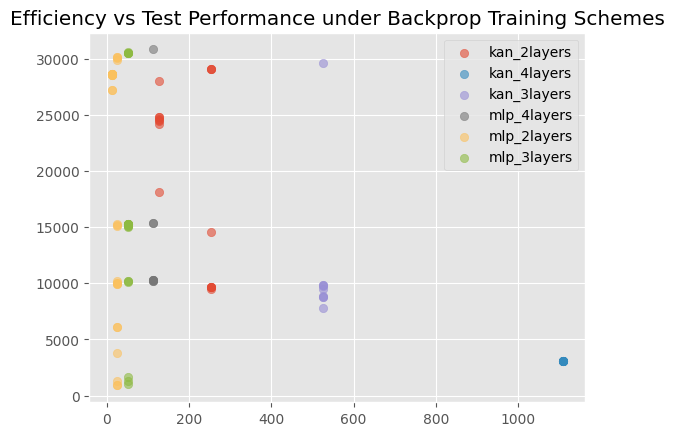

In [62]:
import matplotlib.pyplot as plt
for model in set(np.unique(df['ModelType'])):
    sa = df[(df.ModelType ==model)]
    plt.scatter(sa.Num_parameters/1000, sa.Efficiency, marker = 'o', label = model, alpha = 0.6)
plt.legend()
plt.title("Efficiency vs Test Performance under Backprop Training Schemes")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'kan_2layers'),
  Text(1, 0, 'kan_3layers'),
  Text(2, 0, 'kan_4layers'),
  Text(3, 0, 'mlp_2layers'),
  Text(4, 0, 'mlp_3layers'),
  Text(5, 0, 'mlp_4layers')])

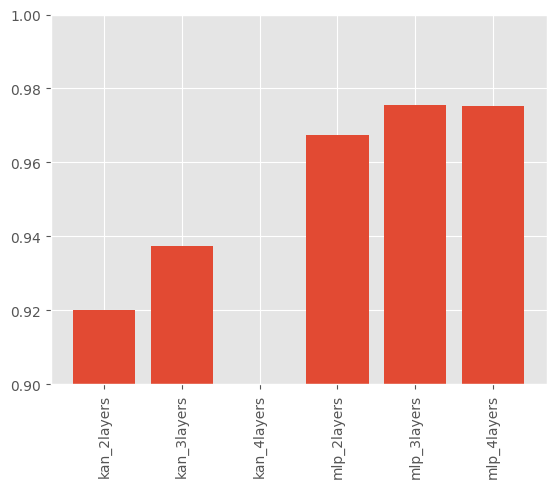

In [63]:
zs = df.groupby("ModelType", group_keys=True)[['Best_test']].max()
plt.bar(zs.index, zs.Best_test); plt.ylim(0.9,1)
plt.xticks(rotation = 90)